## Par lecture de la table dynamique sur le site web

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import numpy as np

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument('--disable-dev-shm-usage')

wd = webdriver.Chrome(r'C:\Users\ltestut\chromedriver.exe',options=options)

url = r"https://www.isdm-gdsi.gc.ca/isdm-gdsi/twl-mne/maps-cartes/inventory-inventaire-eng.asp?user=isdm-gdsi&region=MEDS&tst=1&perm=1"
wd.get(url)
wd.maximize_window()

time.sleep(4)

# select = Select(wd.find_element_by_name('kategorija'))
# select.select_by_value(x)
# time.sleep(3)

html = wd.page_source
df = pd.read_html(html)[0]
page_list = wd.find_elements(By.XPATH, "//a[@class='paginate_button ']")
# total_page = np.arange(int(page_list[0].text.replace('Jump to: Page\n', '')), 
#                        int(page_list[-1].text.replace('Jump to: Page\n', ''))+1,1)
# stop = False
# while not stop :
#     if int([p.text.replace('Jump to: Page\n', '') for p in page_list][-1]) == total_page[0]:
#         stop = True
#     for p in page_list:
#         if int(p.text.replace('Jump to: Page\n', '')) == total_page[0]:
#             print_page = p.text.replace('Jump to: Page\n', '')
#             print(f" .. Scrapping page {print_page} / {total_page[-1]}", end='\r')
#             total_page=total_page[1:]
#             p.click()
#             time.sleep(1)
#             page_list = wd.find_elements(By.XPATH, "//a[@class='paginate_button ']")
#             html = wd.page_source
#             df = pd.concat((df, pd.read_html(html)[0]), ignore_index=True)
#             break

# wd.quit()

C:\Users\ltestut\AppData\Local\Temp\ipykernel_20080\3096736338.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(r'C:\Users\ltestut\chromedriver.exe',options=options)


In [3]:
page_list[0].text

'Jump to: Page\n2'

In [4]:
df

Station       Station Name  LAT (ºN)  LONG (ºW) Region
0       65         SAINT JOHN     45.25      66.06    ATL
1      365           YARMOUTH     43.83      66.12    ATL
2      491  BEDFORD INSTITUTE     44.68      63.62    ATL
3      612       NORTH SYDNEY     46.22      60.25    ATL
4      665   PORT AUX BASQUES     47.57      59.13    ATL
5      755       ST. LAWRENCE     46.92      55.39    ATL
6      835           ARGENTIA     47.30      53.98    ATL
7      905           ST JOHNS     47.57      52.72    ATL
8      990          BONAVISTA     48.65      53.12    ATL
9     1430               NAIN     56.55      61.68    ATL

In [5]:
from tgcat.core.generic import Site, Catalog
sites = []
for i, raw in df.iterrows():
    s = Site(lat=raw['LAT (ºN)'],
             lon=-raw['LONG (ºW)'],
             name=raw['Station Name'],
             id={'tgcan':raw['Station']},
             link=[fr"https://www.isdm-gdsi.gc.ca/isdm-gdsi/twl-mne/inventory-inventaire/sd-ds-eng.asp?no={raw.Station}&user=isdm-gdsi&region=MEDS"],
             data={'download':fr"https://www.isdm-gdsi.gc.ca/isdm-gdsi/twl-mne/inventory-inventaire/interval-intervalle-eng.asp?user=isdm-gdsi&region=MEDS&tst=1&no={raw.Station}"})
    sites.append(s)

AttributeError: 'list' object has no attribute 'keys'

In [6]:
-lons

NameError: name 'lons' is not defined

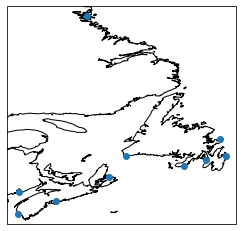

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

lats = df['LAT (ºN)'].values
lons = df['LONG (ºW)'].values

ax.plot(-lons,lats, 'o', transform=ccrs.Geodetic())

In [8]:
refmar_df = pd.DataFrame(data={'id':df['Id REFMAR'], 'name':df['Nom'], 'provider':df['Gestionnaire']})

KeyError: 'Id REFMAR'

In [9]:
lons, lats = [], []
for i in refmar_df['id']:
    url = fr"https://services.data.shom.fr/maregraphie/service/completetidegauge/{i}"
    df = pd.read_json(url, orient='index').T
    lons += [df.longitude.values[0]]
    lats += [df.latitude.values[0]]

NameError: name 'refmar_df' is not defined

In [201]:
refmar_df['Longitude'] = lons
refmar_df['Latitude'] = lats

In [202]:
refmar_df.

id               name                      provider   Longitude  \
0    6257  AIGUILLON-SUR-MER                       SPC VCA   -1.316389   
1     300   AJACCIO_ASPRETTO                          Shom    8.762850   
2    6118              AMBES  Grand Port Maritime Bordeaux   -0.603517   
3     190     ARCACHON_EYRAC                          Shom   -1.163550   
4    6305      AUDIERNE_PORT                          Shom   -4.537583   
..    ...                ...                           ...         ...   
133   113             TUBUAI                           UPF -149.475536   
134  6275                URT      DREAL Nouvelle Aquitaine   -1.299518   
135   317             VAIRAO                           UPF -149.295000   
136  6138          VERGEROUX      DREAL Nouvelle Aquitaine   -0.983333   
137  6274       VILLEFRANQUE      DREAL Nouvelle Aquitaine   -1.460240   

      Latitude  
0    46.335000  
1    41.922798  
2    45.040483  
3    44.665001  
4    48.021550  
..         ...  
133 -23.341768  
134  43.502529  
135 -17.805900  
136  45.950000  
137  43.437977  

[138 rows x 5 columns]

In [24]:
cat_can = Catalog(name='tgcan', sites=sites, color='red')

In [25]:
cat_can.map()